In [11]:
## This is the final document for implementing our tag model.

In [1]:
## Libraries required.

# Basics

import pandas as pd
import numpy as np
import re

#Visual
import seaborn as sns
import matplotlib.pyplot as plt

#Sklearn
from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split



c:\Users\baron\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
## Opening the dataset.

df = pd.read_csv("Database FGVFlow - Página1.csv")

## Data exploration

In [14]:
df.head()
df.info()

## Dataframe working 100%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q User          110 non-null    int64 
 1   Q ID            110 non-null    int64 
 2   Title           110 non-null    object
 3   Questions Body  110 non-null    object
 4   Q Score         110 non-null    int64 
 5   Answer user     110 non-null    int64 
 6   Answers Body    110 non-null    object
 7   A Score         110 non-null    int64 
 8   Tags            110 non-null    object
dtypes: int64(5), object(4)
memory usage: 7.9+ KB


In [15]:
df.describe()

,Q User,Q ID,Q Score,Answer user,A Score
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,348711.427273,55.500000,24.436364,353472.027273,12.336364
std,30519.566053,31.898276,61.100238,28119.239577,32.752695
min,300751.000000,1.000000,1.000000,301291.000000,0.000000
25%,324510.000000,28.250000,4.000000,332464.250000,1.000000
50%,347410.500000,55.500000,6.000000,350845.500000,2.000000
75%,372838.500000,82.750000,22.000000,379885.500000,10.000000
max,398940.000000,110.000000,545.000000,399017.000000,300.000000


In [3]:
# Lets first clean the base so we can select the variables we need for the model.

df.drop({"Q User", "Q ID", "Answer user"}, axis=1, inplace=True)
df

,Title,Questions Body,Q Score,Answers Body,A Score,Tags
0,What is anarchy?,I did not really got what anarchy is. Does som...,5,"Anarchy is, firstly, a structure in which a sy...",2,International History; Anarchy
1,What is the difference between international a...,"Answering the list 3 of IR Theory, I couldn't ...",4,"Yes, you are",1,IR Theory
2,SRA number,What is the SRA phone number?,3,It's (11) 929292-92929,17,SRA
3,Get ready for microeconomics exam,I am having a microeconomics exam next week an...,6,"First of all, review your mock exams and your ...",6,Microeconomics
4,Getting in touch with Oliver Stuenkel,"Hi, folks! I must talk w/ Oliver asap, but I c...",1,You can access the list of OH links in the int...,5,Contact
...,...,...,...,...,...,...
105,Nice movies and IR,"Advise me on some nice IR related movies, plea...",19,There is a nice show called Bortført.,100,Movie; IR
106,UiO Exchange,"Hello, guys! I am going to the University of O...",23,Sure! You should look if they are offering a c...,10,Exchange program
107,All syllabus,Does anyone know where I can find the syllabi ...,24,You can find it in intranet. All syllabi — for...,12,Syllabus
108,Predictive Analytics,Is taking the predictive analytics elective co...,24,"It is very hard, but totally worth. I learned ...",12,Predictive Analytics


In [17]:
## Lets check if there are duplicate values

df.duplicated().sum()

## There are no duplicated values.

0

In [18]:
## What about NAs?

total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
     [total, percent],
      axis=1,
      keys=['Total', 'Percent'])
      
missing_data.head(20)

## There are no missing data in the dataframe.

,Total,Percent
Title,0,0.0
Questions Body,0,0.0
Q Score,0,0.0
Answers Body,0,0.0
A Score,0,0.0
Tags,0,0.0


In [21]:
## Lets check if there is any correlation between both question and answer score.

corr_matrix = df.corr().sort_values(
    by = "Q Score",  ascending=False, key = abs)
corr_matrix

## There is a correlation but is not that significant.

,Q Score,A Score
Q Score,1.000000,0.427872
A Score,0.427872,1.000000


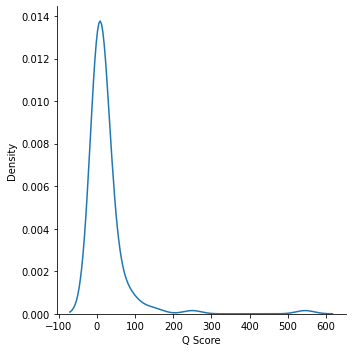

In [23]:
## Lets see how the distribution of scores goes

sns.displot(df, x="Q Score", kind="kde")

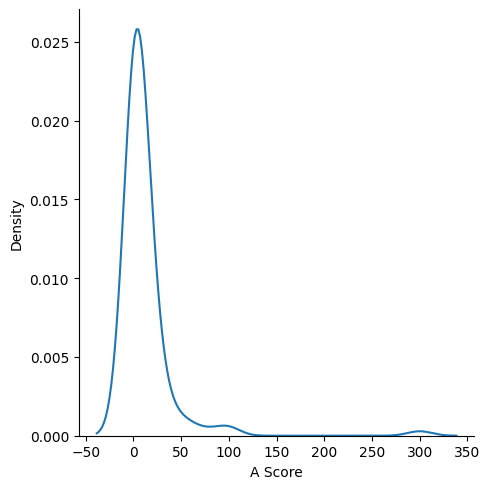

In [24]:
# Now for answer scores

sns.displot(df, x="A Score", kind="kde")

In [27]:
## Now lets see how tags work in this dataframe.

tags = df.groupby(['Tags'], sort=True)['Tags'].count()
tags.sort_values(ascending=False).head(20)

## As expected, tags related to International Relations are those most common in the dataframe.

Tags
IR Theory                          10
Exchange program                    9
General                             8
International Development           7
SRA                                 6
Brazilian Foreign Policy            5
International Political Economy     5
Data science                        4
Grades                              4
Game Theory                         3
Calendar                            3
International Law; fairness         3
Thesis                              2
Macroeconomy                        2
Internship                          2
International Law                   2
Writing                             2
Career                              2
Contact                             2
Classes policy                      2
Name: Tags, dtype: int64

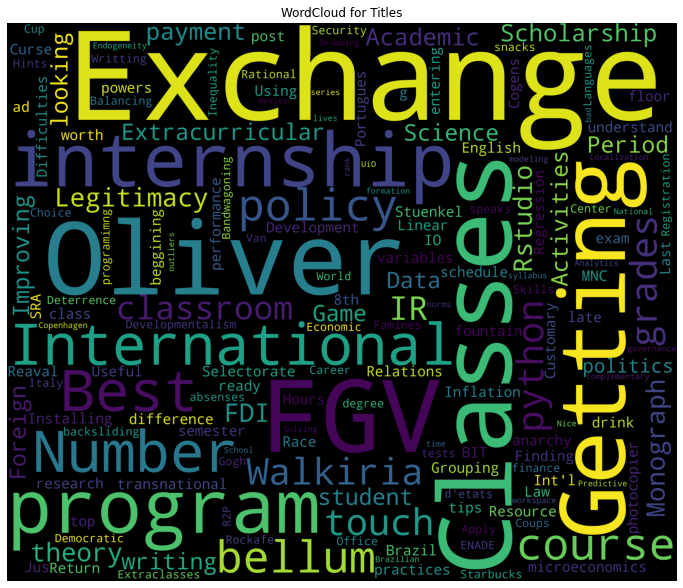

In [6]:
#WordCloud
!pip install wordcloud

from wordcloud import WordCloud,STOPWORDS

words = ' '.join(df['Title'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud for Titles")
plt.show()

## Preparation of the model

In [7]:
#normalizing body text
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

    df['Questions Body'] = df['Questions Body'].apply(lambda x: clean_text(x)) 

In [8]:
#getting ready for modelling
x1 = df['Questions Body']
x2 = df['Title']
y = df['Tags']

In [9]:
#td-idfing them
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [10]:
#applying tf-idf
x1_tfidf = vectorizer_X1.fit_transform(x1)
x2_tfidf = vectorizer_X2.fit_transform(x2)

In [11]:
#stacking all our arrays in sequence, horizontally
from scipy.sparse import hstack

X_tfidf = hstack([x1_tfidf, x2_tfidf])

In [12]:
#splitting to code later
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 0)

In [13]:
#packages to test
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.multiclass import OneVsRestClassifier


In [18]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()



for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier


ValueError: No axis named 1 for object type Series